In [41]:
import pandas as pd
machine=pd.read_csv('machine.csv')

In [42]:
machine.describe()

,125,256,6000,256.1,16,128,198,199
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [43]:
machine.columns=["Vendor Name",'Model Name','MYCT','MMIN','MMAX','CACH'
                ,'CHMIN','CHMAX','PRP','ERP']

In [44]:
machine.head()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [45]:
machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  208 non-null    object
 1   Model Name   208 non-null    object
 2   MYCT         208 non-null    int64 
 3   MMIN         208 non-null    int64 
 4   MMAX         208 non-null    int64 
 5   CACH         208 non-null    int64 
 6   CHMIN        208 non-null    int64 
 7   CHMAX        208 non-null    int64 
 8   PRP          208 non-null    int64 
 9   ERP          208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [46]:
machine=machine.drop(columns=['Vendor Name','Model Name','ERP'])

In [47]:
machine.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,29,8000,32000,32,8,32,269
1,29,8000,32000,32,8,32,220
2,29,8000,32000,32,8,32,172
3,29,8000,16000,32,8,16,132
4,26,8000,32000,64,8,32,318


<AxesSubplot:>

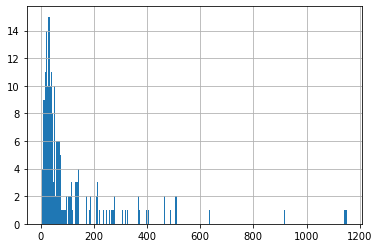

In [48]:
machine["PRP"].hist(bins=290)

In [49]:
correlation_matrix=machine.corr()
correlation_matrix["PRP"]

MYCT    -0.306571
MMIN     0.798310
MMAX     0.865576
CACH     0.704642
CHMIN    0.608841
CHMAX    0.621309
PRP      1.000000
Name: PRP, dtype: float64

In [50]:
X=machine.drop("PRP",axis=1)
X=X.values
y=machine["PRP"]
y=y.values

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds=knn_model.predict(X_train)
mse=mean_squared_error(y_train,train_preds)
rmse=sqrt(mse)
print("Error rate on training data :",rmse)

Error rate on training data : 42.4771928724576


In [54]:
test_preds=knn_model.predict(X_test)
mse=mean_squared_error(y_test,test_preds)
rmse=sqrt(mse)
print("Error rate on testing data :",rmse)

Error rate on testing data : 51.378407339472304


In [55]:
from sklearn.model_selection import GridSearchCV
parameters={"n_neighbors":range(1,50)}
gridsearch=GridSearchCV(KNeighborsRegressor(),parameters)
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [56]:
gridsearch.best_params_

{'n_neighbors': 3}

In [57]:
train_preds_grid=gridsearch.predict(X_train)
train_mse=mean_squared_error(y_train,train_preds_grid)
train_rmse=sqrt(train_mse)

test_preds_grid=gridsearch.predict(X_test)
test_mse=mean_squared_error(y_test,test_preds_grid)
test_rmse=sqrt(test_mse)

print("Train Error :", train_rmse)
print("Test error :" ,test_rmse)

Train Error : 42.4771928724576
Test error : 51.378407339472304
